# Single Waveform Generation example

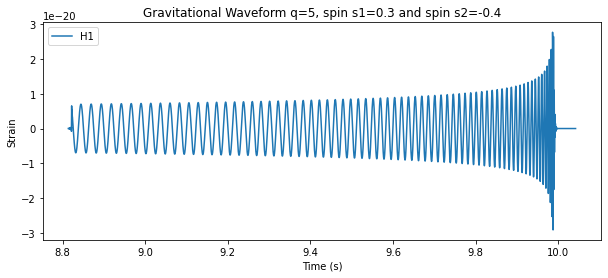

In [3]:
import numpy as np
import os
from waveform_utils import WaveformData

# Set the parameters for the waveform
q = 5
spin1 = 0.3
spin2 = -0.4

# Create an instance of WaveformData with the specified parameters
waveform = WaveformData(q=q, spin1=spin1, spin2=spin2)

# Plot the waveform
waveform.plot()

# Save the waveform to an HDF5 file in a specified folder
save_folder = "waveform_data_single"
os.makedirs(save_folder, exist_ok=True)

waveform.save_to_hdf5(save_folder)

In [3]:
waveform.normalize_waveform()

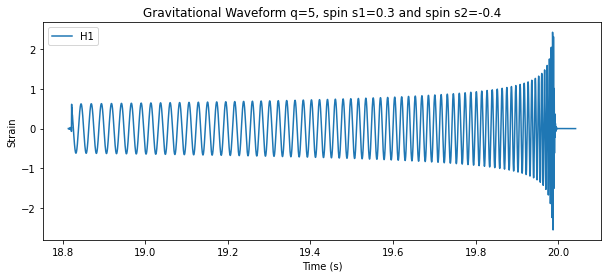

In [7]:
waveform.plot()

In [8]:
waveform.denormalize_waveform()

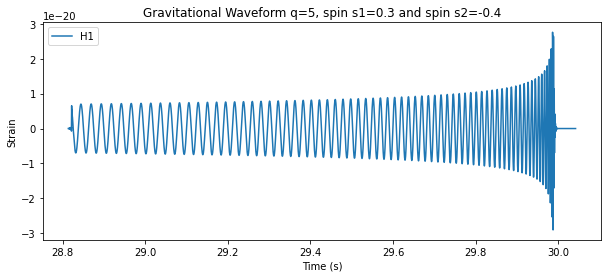

In [9]:
waveform.plot()

# Multiple Waveform Generation

In [1]:
import numpy as np
from waveform_utils import generate_waveforms_in_parallel

# Define a grid of parameter values for q, spin1, and spin2
q_values = np.linspace(1.0, 3.0, 5)          # Mass ratio from 1.0 to 3.0 in 5 steps
spin1_values = np.linspace(-0.9, 0.9, 5)     # Spin1 from -0.9 to 0.9 in 5 steps
spin2_values = np.linspace(-0.9, 0.9, 5)     # Spin2 from -0.9 to 0.9 in 5 steps

# Create a list of tuples instead of dictionaries
params_list = [(q, spin1, spin2) for q in q_values for spin1 in spin1_values for spin2 in spin2_values]

# Call the generate_waveforms_in_parallel function
output_directory = 'waveform_data'
generate_waveforms_in_parallel(params_list, output_directory)


/home/diego_gw/anaconda3/envs/CW_backup/lib/python3.8/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


Enter the number of cores to use for parallel generation:  12


Generating waveforms: 100%|██████████| 125/125 [00:43<00:00,  2.88it/s]

Waveform generation completed. Files saved in waveform_data/


# GAN and LENGTH_ESTIMATOR training

In [1]:
from torch.utils.data import DataLoader, random_split
from DL_utils import WaveformDataset, GAN, LengthEstimator

dataset_path = 'waveform_data'
batch_size = 64
num_epochs = 100
num_workers = 16

# Create the dataset and split into training and validation sets
dataset = WaveformDataset(folder_path=dataset_path, augment=True)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers = num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers = num_workers)

# Set the output dimension to match the waveform length
_, sample_waveform, _, _, _ = dataset[0]
output_dim = sample_waveform.shape[0]  # Length of hp waveform

/home/diego_gw/anaconda3/envs/CW_backup/lib/python3.8/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


/home/diego_gw/anaconda3/envs/CW_backup/lib/python3.8/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


target length: 2113
Epoch [1/100], Loss D: 0.6983029842376709, Loss G: 0.8325324654579163
Epoch [2/100], Loss D: 0.6868528127670288, Loss G: 0.8209770321846008
Epoch [3/100], Loss D: 0.6760225296020508, Loss G: 0.8180144429206848
Epoch [4/100], Loss D: 0.6707638502120972, Loss G: 0.8154363036155701
Epoch [5/100], Loss D: 0.6612672805786133, Loss G: 0.8161728382110596
Epoch [6/100], Loss D: 0.6602182984352112, Loss G: 0.8157621026039124
Epoch [7/100], Loss D: 0.656571626663208, Loss G: 0.8204873204231262
Epoch [8/100], Loss D: 0.6580973863601685, Loss G: 0.8154086470603943
Epoch [9/100], Loss D: 0.6417797803878784, Loss G: 0.8170479536056519
Epoch [10/100], Loss D: 0.644980788230896, Loss G: 0.817068874835968
Epoch [11/100], Loss D: 0.6570590138435364, Loss G: 0.8098454475402832
Epoch [12/100], Loss D: 0.6458567976951599, Loss G: 0.8135303854942322
Epoch [13/100], Loss D: 0.6317353248596191, Loss G: 0.8149012923240662
Epoch [14/100], Loss D: 0.6443684101104736, Loss G: 0.816132366657257

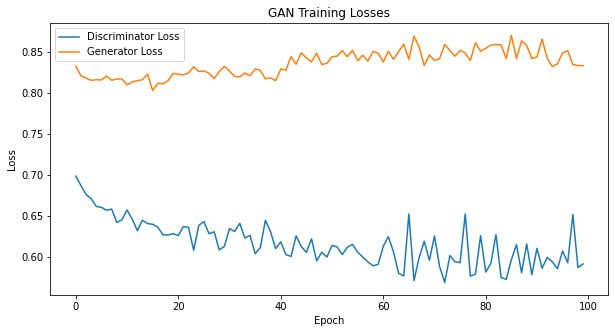

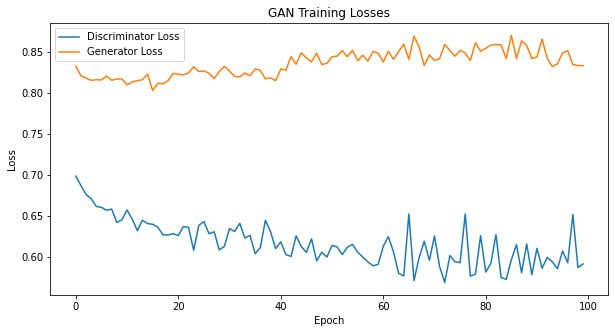

Models saved: models/GAN_models/waveform_gan_generator.pth, models/GAN_models/waveform_gan_discriminator.pth


In [1]:
# Train the GAN
gan = GAN(input_dim=6, output_dim=output_dim)
gan.train(train_loader, val_loader, num_epochs=num_epochs)
gan.save_model('waveform_gan')

Epoch [1/100], Length Estimator Loss: 5110702.5
Epoch [2/100], Length Estimator Loss: 4691031.0
Epoch [3/100], Length Estimator Loss: 5386433.0
Epoch [4/100], Length Estimator Loss: 3960589.0
Epoch [5/100], Length Estimator Loss: 4302540.0
Epoch [6/100], Length Estimator Loss: 5272260.5
Epoch [7/100], Length Estimator Loss: 5124858.5
Epoch [8/100], Length Estimator Loss: 5035414.0
Epoch [9/100], Length Estimator Loss: 5176560.0
Epoch [10/100], Length Estimator Loss: 5108362.5
Epoch [11/100], Length Estimator Loss: 5211592.5
Epoch [12/100], Length Estimator Loss: 5061640.5
Epoch [13/100], Length Estimator Loss: 5299416.0
Epoch [14/100], Length Estimator Loss: 5468370.0
Epoch [15/100], Length Estimator Loss: 5060593.0
Epoch [16/100], Length Estimator Loss: 5122660.5
Epoch [17/100], Length Estimator Loss: 4824833.5
Epoch [18/100], Length Estimator Loss: 5459417.0
Epoch [19/100], Length Estimator Loss: 5521181.5
Epoch [20/100], Length Estimator Loss: 5377252.0
Epoch [21/100], Length Estima

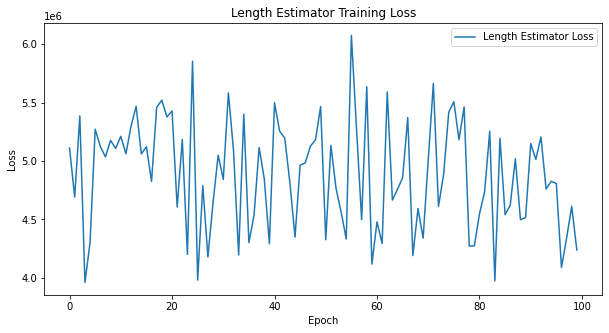

Length estimator model saved: models/LENGTH_model/waveform_length_estimator_length_estimator.pth


In [2]:
# Train the Length Estimator
length_estimator = LengthEstimator()
length_estimator.train_length_estimator(train_loader, val_loader, num_epochs=num_epochs)
length_estimator.save_model('waveform_length_estimator')

# CNN and MLP training

In [10]:
sample_waveform.shape[0]

2113

In [ ]:
dataset_path = 'waveform_data'
batch_size = 16
num_epochs = 100

# Create the dataset and split into training and validation sets
dataset = WaveformDataset(folder_path=dataset_path, augment=True)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Set the output dimension to match the waveform length
_, sample_waveform, _, _, _ = dataset[0]
output_dim = sample_waveform.shape[0]  # Length of hp waveform
input_dim = 3  # Number of input parameters (q, spin1, spin2)

# Train the CNN
cnn = CNN(input_dim=input_dim, output_dim=output_dim)
cnn.train_cnn(train_loader, val_loader, num_epochs=num_epochs)
cnn.save_model('waveform_cnn')

# Train the MLP
mlp = MLP(input_dim=input_dim, output_dim=output_dim)
mlp.train_mlp(train_loader, val_loader, num_epochs=num_epochs)
mlp.save_model('waveform_mlp')


# Inference

In [ ]:
import torch
from scipy.signal import resample
from waveform_utils import WaveformData  # Assuming WaveformData is needed to project and analyze the waveform
from DL_utils import GAN, LengthEstimator  # Replace with CNN or MLP if needed

# Step 1: Load the GAN Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load generator model from GAN
gan = GAN(input_dim=6, output_dim=4096)  # Assuming fixed length output of 4096 samples
gan.generator.load_state_dict(torch.load('GAN_models/waveform_gan_generator.pth', map_location=device))
gan.generator.eval()
gan.generator.to(device)

# Step 2: Generate a Waveform
# Input parameters (q, spin1, spin2)
q = 1.5
spin1 = 0.3
spin2 = -0.2

params = torch.tensor([q, spin1, spin2], dtype=torch.float32).to(device)  # Example values
params = params.unsqueeze(0)  # Add batch dimension
with torch.no_grad():
    generated_waveform = gan.generator(params).squeeze().cpu().numpy()  # Generate waveform

# Step 3: Load the Length Estimator
length_estimator = LengthEstimator()
length_estimator.load_state_dict(torch.load('LENGTH_model/waveform_length_estimator.pth', map_location=device))
length_estimator.eval()
length_estimator.to(device)

# Step 4: Estimate the Original Length and Resample the Generated Waveform
with torch.no_grad():
    estimated_length = length_estimator(params).item()
    estimated_length = int(estimated_length)  # Convert to integer length

# Resample the generated waveform to the estimated length
resampled_waveform = resample(generated_waveform, estimated_length)

# Optional: Project the generated waveform to a detector using WaveformData class for analysis
# This is only needed if you want to visualize or analyze the waveform further
waveform_data = WaveformData(q=1.5, spin1=0.3, spin2=-0.2)
waveform_data.hp = torch.tensor(resampled_waveform)  # Set hp to the resampled waveform
waveform_data.plot()
